# DS lab assignment 2

Group members: Md Masum Billah, Vinay Sanga, Ammara Asif

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
# Removing column b
df = df.drop(columns=['b'])

# information about the data
info_data = df.info()

# Provide descriptive statistics
desc_data = df.describe()

#Check for missing values
missing_values = df.isnull().sum()

info_data, desc_data, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


(None,
              crim          zn       indus        chas         nox          rm  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               age         dis         rad         tax     ptratio       lstat  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
 std   

# Splitting test and train dataset in 80:20 ratio

In [3]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets (80% train, 20% test)
X = df.drop('medv', axis=1)  # Features
y = df['medv']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

# Applying and finding accuracy of Linear and Random forest regression without removing any columns/features (on Original dataset)

Applying Linear Regression and printing accuracy on original dataset

In [4]:
from sklearn.linear_model import LinearRegression

#Applying Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_accuracy = linear_model.score(X_test, y_test) * 100  # Accuracy in percentage

linear_accuracy

68.93967884614753

Applying Random Forest and printing accuracy on original dataset

In [5]:
from sklearn.ensemble import RandomForestRegressor

#Applying Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test) * 100  # Accuracy in percentage

rf_accuracy

89.07962174500659

# Applying and finding accuracy of Linear and Random forest regression by removing less important features from the Random Forest model (On Feature Importance Filtered dataset)

First, finding less importance features from the Random Forest model

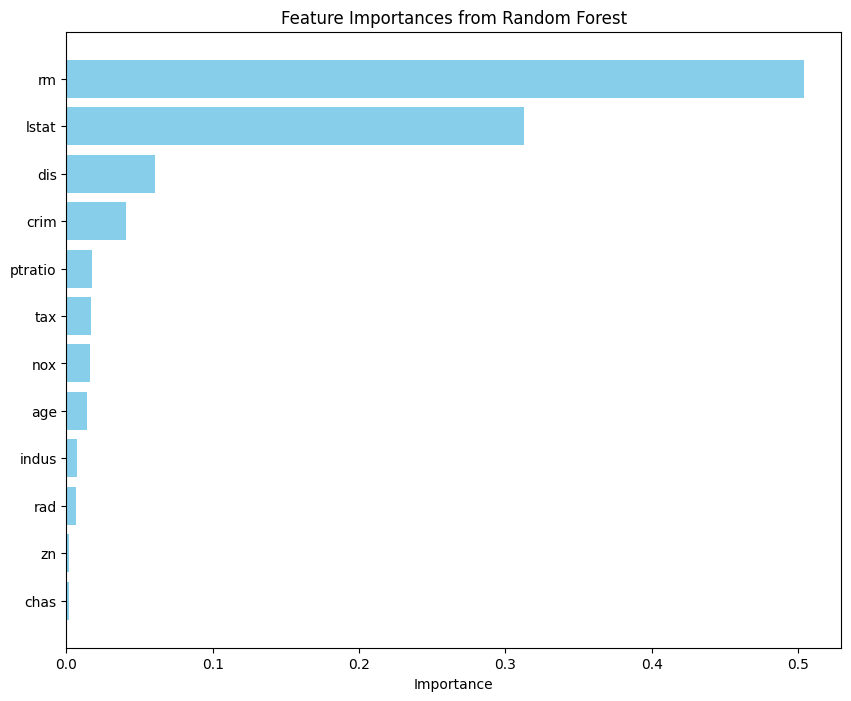

,Feature,Importance
3,chas,0.001651
1,zn,0.001755
8,rad,0.006260
2,indus,0.007271
6,age,0.014260
4,nox,0.016024
9,tax,0.016670
10,ptratio,0.017454
0,crim,0.040851
7,dis,0.060598


In [6]:
# Getting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features based on importance
sorted_features_df = features_df.sort_values(by='Importance', ascending=True)

# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(sorted_features_df['Feature'], sorted_features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

sorted_features_df

For this exercise, I'll start by removing the four least important features: chas, zn, rad, and indus.

Then, Applying Linear Regression and printing accuracy on Feature Importance Filtered dataset


In [7]:
# Removing the least important features
columns_to_drop = ['chas', 'zn', 'rad', 'indus']
X_modified = X.drop(columns=columns_to_drop)

# Splitting the modified dataset into training and test sets
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(
    X_modified, y, test_size=0.2, random_state=42
)


# Linear Regression
linear_model_modified = LinearRegression()
linear_model_modified.fit(X_train_modified, y_train_modified)
linear_accuracy_modified = linear_model_modified.score(X_test_modified, y_test_modified) * 100


linear_accuracy_modified

63.98034066650792

Applying Random Forest and printing accuracy on Feature Importance Filtered dataset

In [8]:
# Random Forest
rf_model_modified = RandomForestRegressor(random_state=42)
rf_model_modified.fit(X_train_modified, y_train_modified)
rf_accuracy_modified = rf_model_modified.score(X_test_modified, y_test_modified) * 100

rf_accuracy_modified

88.81871331868206

# Applying and finding accuracy of Liner and Random forest regression by removing less important features using the correlation matrix (On Correlation-Based Filtered dataset).
Removal critaria is giben below
1. Features with a very low correlation of less than 0.3 with the target variable.
2. Features that have a very high correlation of more than 0.9 with each other.


<Axes: >

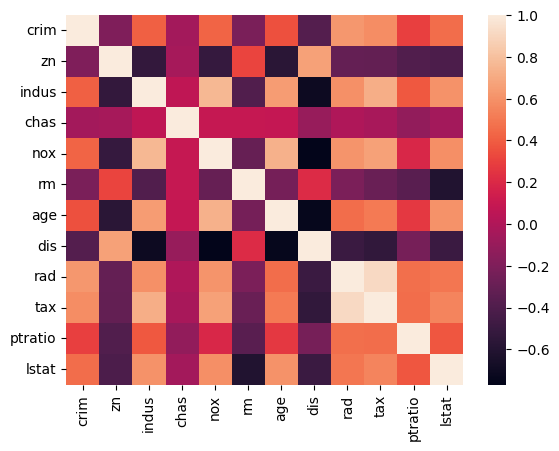

In [9]:
import seaborn as sns
X = df.drop(columns=['medv'])
y = df['medv']
correlation=X.corr()
correlation
sns.heatmap(correlation,cbar=True)

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

#Identifying features with correlation less than 0.3 with the target variable 'MEDV'
low_corr_with_target = correlation_matrix.index[correlation_matrix['medv'].abs() < 0.3]

#Identifying features that have a correlation of more than 0.9 with each other (excluding diagonal)
upper_triangle = correlation_matrix.where(
    pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool)
)
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

#Combining the lists of features to be removed
features_to_remove = list(set(low_corr_with_target) | set(highly_correlated_features))

features_to_remove

<ipython-input-10-c4783860ea20>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(correlation_matrix.shape), k=1).astype(bool)


['dis', 'chas', 'tax']

Applying Linear regression and printing accuracy on Correlation-Based Filtered  dataset

In [11]:
# Removing the identified features
X_modified_2 = X.drop(columns=features_to_remove)

# Splitting the modified dataset into training and test sets
X_train_modified_2, X_test_modified_2, y_train_modified_2, y_test_modified_2 = train_test_split(
    X_modified_2, y, test_size=0.2, random_state=42
)

# Retraining both models on the modified dataset

# Linear Regression
linear_model_modified_2 = LinearRegression()
linear_model_modified_2.fit(X_train_modified_2, y_train_modified_2)
linear_accuracy_modified_2 = linear_model_modified_2.score(X_test_modified_2, y_test_modified_2) * 100

linear_accuracy_modified_2

61.90445150906578

Applying Random Forest and printing accuracy on Correlation-Based Filtered  dataset

In [12]:
# Random Forest
rf_model_modified_2 = RandomForestRegressor(random_state=42)
rf_model_modified_2.fit(X_train_modified_2, y_train_modified_2)
rf_accuracy_modified_2 = rf_model_modified_2.score(X_test_modified_2, y_test_modified_2) * 100

rf_accuracy_modified_2

87.21120606683917


# Compare results
Please follow the attached file in the submission section for result comparison and further discussion
